# Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sympy import Matrix
from IPython.display import display, Math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
from imblearn.over_sampling import SMOTE

In [9]:
def prec_mat(y,yhat):
    
    y_true = len(y[y==1])
    y_false = len(y[y==0])
    
    yhat_true = len(yhat[yhat==1])
    yhat_false = len(yhat[yhat==0])
    
    error = y - yhat
    
    inc_true = len(error[error==1])
    inc_false = len(error[error==-1])
    
    cor_true = y_true - inc_true
    cor_false = y_false - inc_false
    
    y_mat = np.array([[cor_true/y_true,inc_false/y_false],[inc_true/y_true,cor_false/y_false]])
  
    return y_mat

In [3]:
def NN_prop(Xb,y,M,epochs,alpha):

    n = Xb.shape[0]

    p = Xb.shape[1] - 1

    q = y.shape[1]

    V = np.random.randn(M+1, q); 
    W = np.random.randn(p+1, M);
    
    def logsig(_x):
        return 1/(1+np.exp(-_x))

    for epoch in range(epochs):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            yhat = logsig(H@V)
             # Backpropagate
            delta = (yhat-y[i,:])*yhat*(1-yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
    H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
    yhat = np.round(logsig(H@V))
    yhat = yhat.astype(int)
    err = y - yhat
    err = np.count_nonzero(err) / y.shape[0]
    
    return W,V,yhat,err

In [4]:
def NN_eval(X,W,V,y):

    n = X.shape[0]
    
    def logsig(_x):
        return 1/(1+np.exp(-_x))
    
    H = logsig(np.hstack((np.ones((n,1)), X@W)))
    yhat = np.round(logsig(H@V))
    yhat = yhat.astype(int)
    err = y - yhat
    err = np.count_nonzero(err) / y.shape[0]

    return yhat,err

## Load and Process Data

In [17]:
data = pd.read_csv('nasa_train.csv')

### Scale Features and Implement SMOTE

In [18]:
y_pre = data.Hazardous.values.reshape(-1,1)
y_pre = 1/2 * (y_pre + 1)
y_pre = y_pre.astype(int)
X_pre = data.drop(['Hazardous'],axis=1).values
X_scale = np.max(X_pre,axis=0)
X_pre = np.divide(X_pre,X_scale)
X, y = sm.fit_sample(X_pre, y_pre.ravel()) 
y = np.reshape(y,[len(y),1])
n = X.shape[0]

In [19]:
data = pd.read_csv('nasa_test.csv')
y_test = data.Hazardous.values.reshape(-1,1)
y_test = 1/2 * (y_test + 1)
y_test = y_test.astype(int)
X_unscaled = data.drop(['Hazardous'],axis=1).values
X_test = np.divide(X_unscaled,X_scale)
Xb_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))

## All Feature Neural Network

In [7]:
Xb = np.hstack((np.ones((n,1)), X))
M = 4
epochs = 500
alpha = 0.01
w,v,yhat,err = NN_prop(Xb,y,M,epochs,alpha)

In [10]:
print('The error using all features on the oversampled data is',np.round(err*100,1),'%')
conf_mat = prec_mat(y,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The error using all features on the oversampled data is 3.2 %


Matrix([
[99.4,  5.8],
[ 0.6, 94.2]])

In [11]:
Xb_pre = np.hstack((np.ones((X_pre.shape[0],1)), X_pre))
yhat,error = NN_eval(Xb_pre,w,v,y_pre)
print('The error using all features is',np.round(error*100,1),'%')
conf_mat = prec_mat(y_pre,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The error using all features is 5.1 %


Matrix([
[98.4,  5.8],
[ 1.6, 94.2]])

In [20]:
yhat,error = NN_eval(Xb_test,w,v,y_test)
print('The final error is',np.round(error*100,1),'%')
conf_mat = prec_mat(y_test,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The final error is 12.8 %


Matrix([
[18.9,   0.0],
[81.1, 100.0]])

## Feature Selection with Neural Network

### Initial Guess

In [41]:
delete_feat = np.delete(np.arange(X.shape[1]),[0,5,1])
X_3 = np.delete(X,delete_feat,axis=1)
X_3_pre = np.delete(X_pre,delete_feat,axis=1)

Xb_3 = np.hstack((np.ones((n,1)), X_3))
M = 4
epochs = 200
alpha = 0.1
w_3,v_3,yhat,err = NN_prop(Xb_3,y,M,epochs,alpha)

In [42]:
print('The error using three features on the oversampled data is',np.round(err*100,1),'%')
conf_mat = prec_mat(y,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The error using three features on the oversampled data is 5.7 %


Matrix([
[94.9,  6.4],
[ 5.1, 93.6]])

In [43]:
Xb_3_pre = np.hstack((np.ones((X_3_pre.shape[0],1)), X_3_pre))
yhat,error = NN_eval(Xb_3_pre,w_3,v_3,y_pre)
print('The error using three features is',np.round(error*100,1),'%')
conf_mat = prec_mat(y_pre,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The error using three features is 6.6 %


Matrix([
[91.9,  6.4],
[ 8.1, 93.6]])

In [44]:
X_3_test = np.delete(X_test,delete_feat,axis=1)
Xb_3_test = np.hstack((np.ones((X_3_test.shape[0],1)), X_3_test))

yhat,error = NN_eval(Xb_3_test,w_3,v_3,y_test)
print('The test error using two features is',np.round(error*100,1),'%')
conf_mat = prec_mat(y_test,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The test error using two features is 6.6 %


Matrix([
[91.9,  6.3],
[ 8.1, 93.7]])

In [45]:
delete_feat = np.delete(np.arange(X.shape[1]),[0,5])
X_2 = np.delete(X,delete_feat,axis=1)
X_2_pre = np.delete(X_pre,delete_feat,axis=1)

Xb_2 = np.hstack((np.ones((n,1)), X_2))
M = 4
epochs = 200
alpha = 0.1
w_2,v_2,yhat,err = NN_prop(Xb_2,y,M,epochs,alpha)

In [46]:
print('The error using two features on the oversampled data is',np.round(err*100,1),'%')
conf_mat = prec_mat(y,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The error using two features on the oversampled data is 6.7 %


Matrix([
[93.4,  6.7],
[ 6.6, 93.3]])

In [47]:
Xb_2_pre = np.hstack((np.ones((X_2_pre.shape[0],1)), X_2_pre))
yhat,error = NN_eval(Xb_2_pre,w_2,v_2,y_pre)
print('The error using two features is',np.round(error*100,1),'%')
conf_mat = prec_mat(y_pre,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The error using two features is 7.2 %


Matrix([
[90.2,  6.7],
[ 9.8, 93.3]])

In [48]:
X_2_test = np.delete(X_test,delete_feat,axis=1)
Xb_2_test = np.hstack((np.ones((X_2_test.shape[0],1)), X_2_test))

yhat,error = NN_eval(Xb_2_test,w_2,v_2,y_test)
print('The test error using two features is',np.round(error*100,1),'%')
conf_mat = prec_mat(y_test,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The test error using two features is 7.0 %


Matrix([
[91.9,  6.8],
[ 8.1, 93.2]])

## Final Training

In [61]:
data = pd.read_csv('nasa_train.csv')
data.drop(['Est Dia in KM(max)','Relative Velocity km per sec','Miss Dist.(kilometers)','Orbit Uncertainity','Jupiter Tisserand Invariant',
           'Epoch Osculation','Eccentricity','Semi Major Axis','Inclination','Asc Node Longitude','Orbital Period',
           'Perihelion Distance','Perihelion Arg','Aphelion Dist','Perihelion Time','Mean Anomaly','Mean Motion']
           ,axis=1,inplace=True)

In [62]:
y_pre = data.Hazardous.values.reshape(-1,1)
y_pre = 1/2 * (y_pre + 1)
y_pre = y_pre.astype(int)
X_final_pre = data.drop(['Hazardous'],axis=1).values
X_scale = np.max(X_final_pre,axis=0)
X_final_pre = np.divide(X_final_pre,X_scale)
X_final, y = sm.fit_sample(X_final_pre, y_pre.ravel()) 
y = np.reshape(y,[len(y),1])
Xb = np.hstack((np.ones((X_final.shape[0],1)), X_final))

### Impact of M

In [74]:
M = np.array([3,5,10,15,20])
epochs = 100 * M / np.min(M)
epochs = epochs.astype(int)
alpha = 0.1

error_M = np.zeros(len(M))

for i in range(len(M)):
    w,v,yhat,err = NN_prop(Xb,y,M[i],epochs[i],alpha)
    error_M[i] = err

Text(0, 0.5, 'Error [%]')

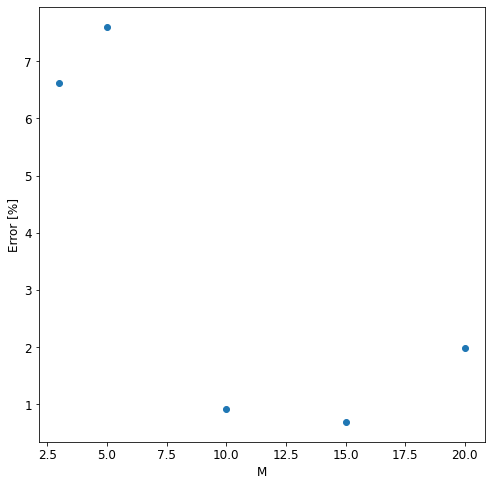

In [75]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.scatter(M,100*error_M)
plt.xlabel('M')
plt.ylabel('Error [%]')

### Impact of Learning Rate

In [77]:
M = 10
epochs = 100 * M
alpha = np.array([0.01,0.1,0.2,0.5])

error_alpha = np.zeros(len(alpha))

for i in range(len(alpha)):
    w,v,yhat,err = NN_prop(Xb,y,M,epochs,alpha[i])
    error_alpha[i] = err

Text(0, 0.5, 'Error [%]')

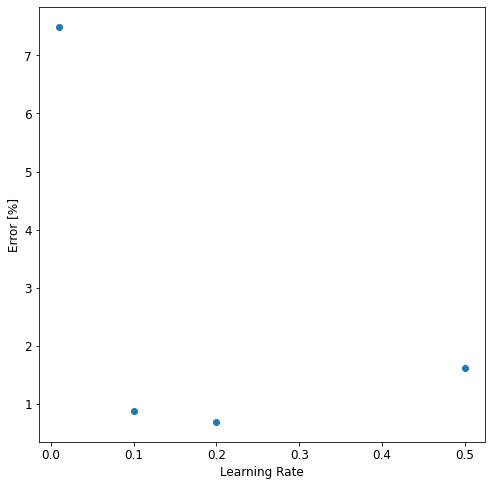

In [78]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.scatter(alpha,100*error_alpha)
plt.xlabel('Learning Rate')
plt.ylabel('Error [%]')

A moderate number of hidden nodes and learning rate works best for the dataset.

In [79]:
M = 10
epochs = 2000
alpha = 0.2
w,v,yhat,err = NN_prop(Xb,y,M,epochs,alpha)

In [80]:
print('The error using two features on the oversampled data is',np.round(err*100,1),'%')
conf_mat = prec_mat(y,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The error using two features on the oversampled data is 0.7 %


Matrix([
[99.5,  0.8],
[ 0.5, 99.2]])

In [81]:
Xb_pre = np.hstack((np.ones((X_final_pre.shape[0],1)), X_final_pre))
yhat,error = NN_eval(Xb_pre,w,v,y_pre)
print('The final error is',np.round(error*100,1),'%')
conf_mat = prec_mat(y_pre,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The final error is 0.9 %


Matrix([
[99.1,  0.8],
[ 0.9, 99.2]])

## Final Testing

In [82]:
data = pd.read_csv('nasa_test.csv')
data.drop(['Est Dia in KM(max)','Relative Velocity km per sec','Miss Dist.(kilometers)','Orbit Uncertainity','Jupiter Tisserand Invariant',
           'Epoch Osculation','Eccentricity','Semi Major Axis','Inclination','Asc Node Longitude','Orbital Period',
           'Perihelion Distance','Perihelion Arg','Aphelion Dist','Perihelion Time','Mean Anomaly','Mean Motion']
           ,axis=1,inplace=True)
y_test = data.Hazardous.values.reshape(-1,1)
y_test = 1/2 * (y_test + 1)
y_test = y_test.astype(int)

X_unscaled = data.drop(['Hazardous'],axis=1).values
X_test = np.divide(X_unscaled,X_scale)
Xb_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))

In [83]:
yhat,error = NN_eval(Xb_test,w,v,y_test)
print('The final test error is',np.round(error*100,1),'%')
conf_mat = prec_mat(y_test,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The final test error is 0.2 %


Matrix([
[100.0,  0.3],
[  0.0, 99.7]])

In [85]:
conf_mat

array([[1.        , 0.00253165],
       [0.        , 0.99746835]])

In [86]:
error

0.0021321961620469083